In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
blobs = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_blobs.csv")
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

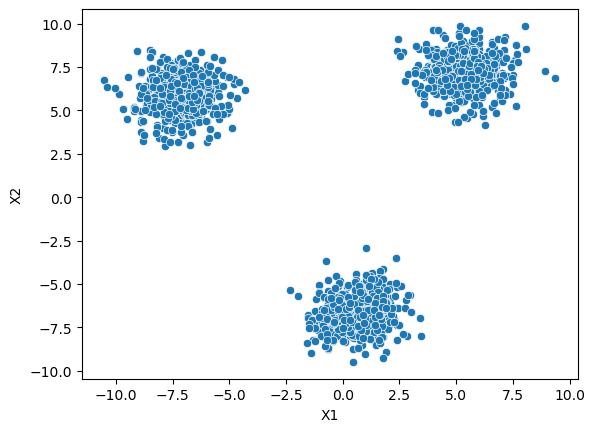

In [3]:
sns.scatterplot(data=blobs , x="X1" , y="X2")

<Axes: xlabel='X1', ylabel='X2'>

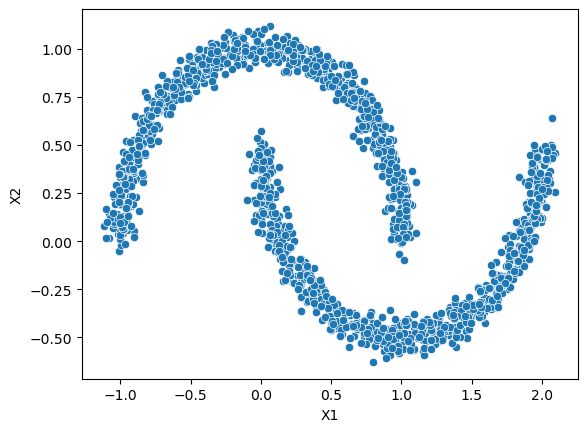

In [4]:
moons = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_moons.csv")
sns.scatterplot(data=moons , x="X1" , y="X2")


<Axes: xlabel='X1', ylabel='X2'>

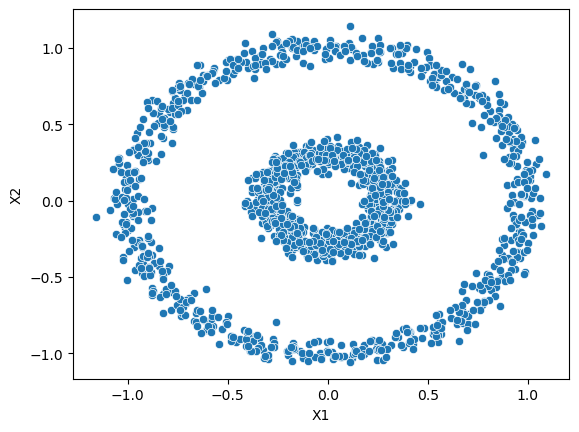

In [5]:
circles = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_circles.csv")
sns.scatterplot(data=circles , x="X1" , y="X2")

In [6]:
def display_cat(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data , x="X1" , y="X2" , hue=labels, palette="Set1")
    

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

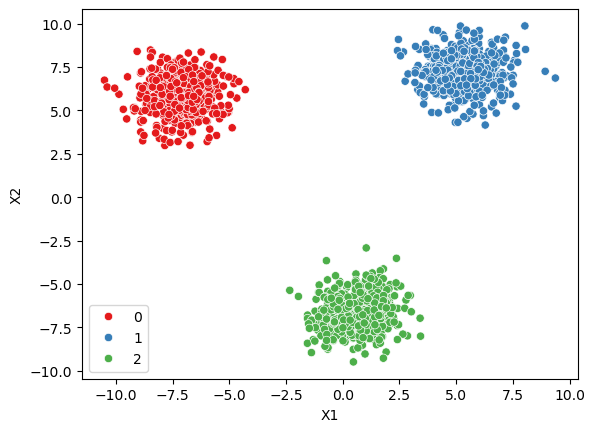

In [8]:
display_cat(model, blobs)

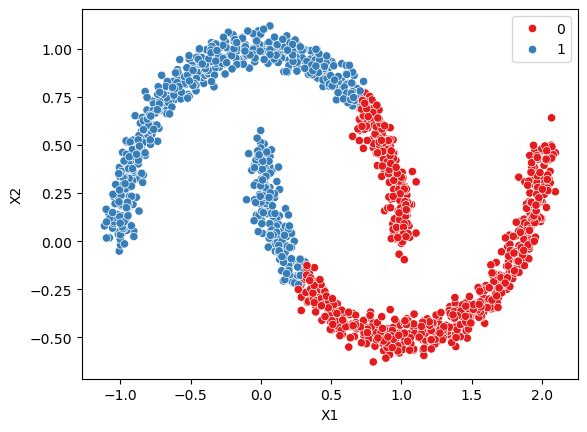

In [9]:
# moons data --> only two set of points 
model = KMeans(n_clusters=2)
display_cat(model, moons)


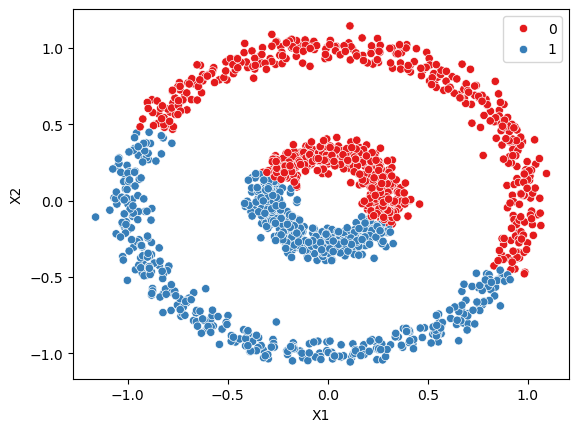

In [10]:
# circles data --> only two set of points 
model = KMeans(n_clusters=2)
display_cat(model, circles)

In [11]:
# performace with dbscan
from sklearn.cluster import DBSCAN
model = DBSCAN()

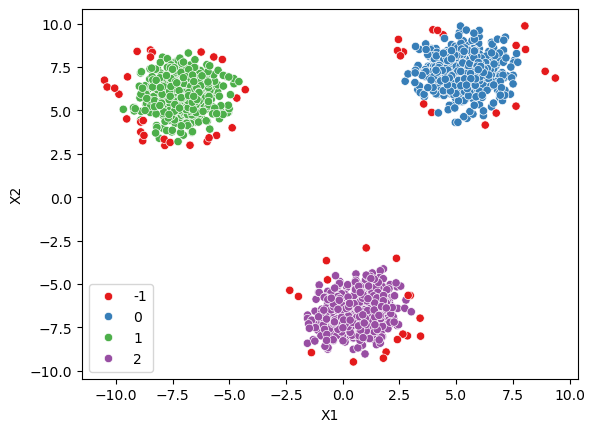

In [13]:
display_cat(model,blobs)

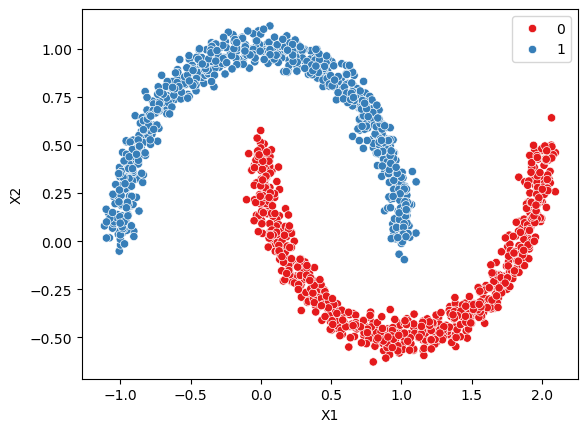

In [14]:
model = DBSCAN(eps=0.15)
display_cat(model,moons)

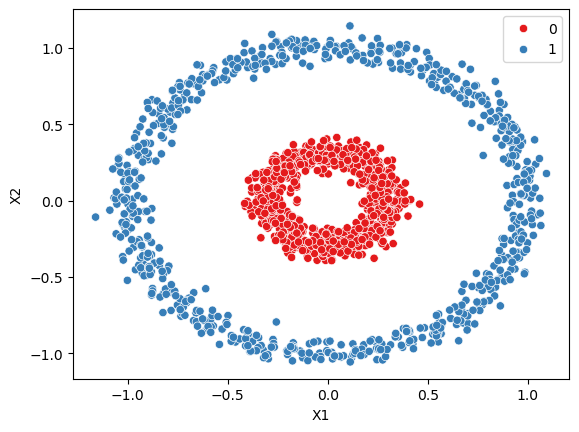

In [15]:
model = DBSCAN(eps=0.15)
display_cat(model,circles)

# HYPERPARAMETERS TUNNING METHODS

In [17]:
two_blobs = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_two_blobs.csv")
two_blobs_outliers = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_two_blobs_outliers.csv")

<Axes: xlabel='X1', ylabel='X2'>

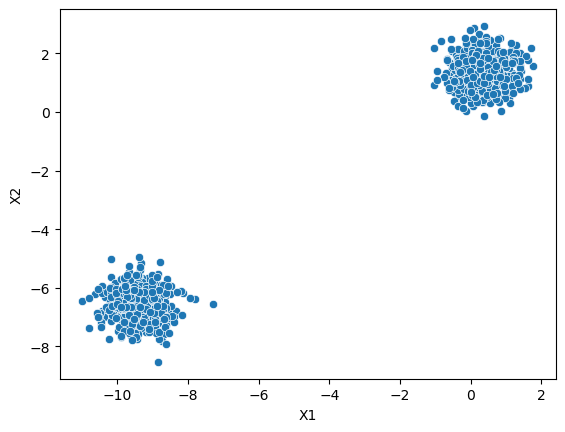

In [18]:
sns.scatterplot(data=two_blobs, x= "X1" , y="X2")

<Axes: xlabel='X1', ylabel='X2'>

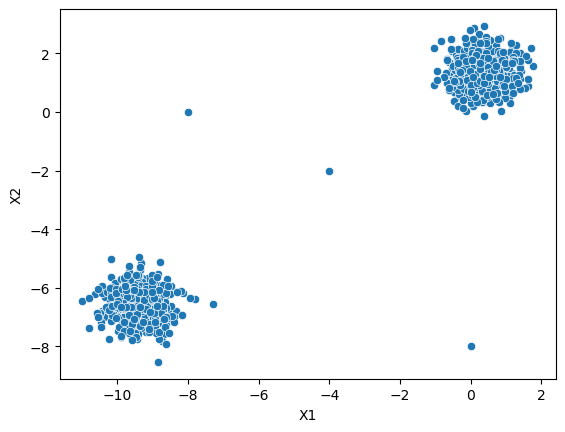

In [19]:
sns.scatterplot(data=two_blobs_outliers, x= "X1" , y="X2")


In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

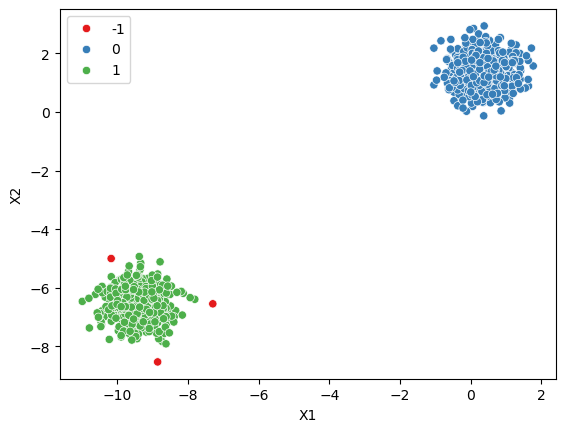

In [21]:
display_cat(dbscan , two_blobs)

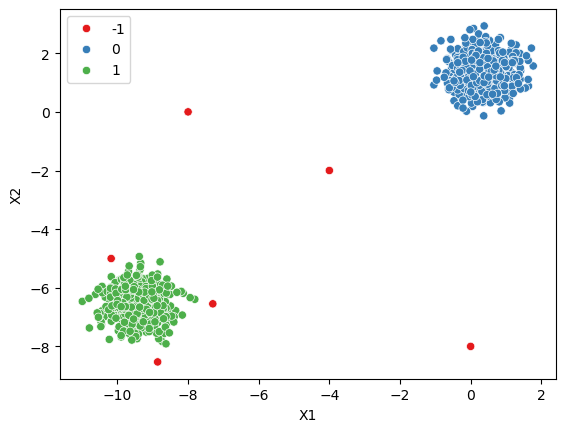

In [22]:
display_cat(dbscan , two_blobs_outliers)


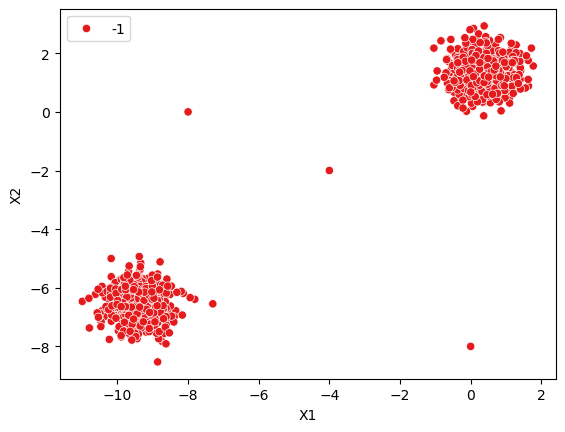

In [27]:
dbscan = DBSCAN(eps=0.001)  # all is aoutlier
display_cat(dbscan , two_blobs_outliers)

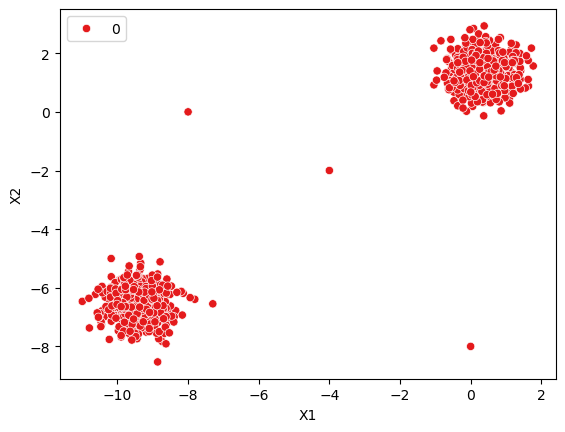

In [28]:
dbscan = DBSCAN(eps=10)  # all is same cluster
display_cat(dbscan , two_blobs_outliers)

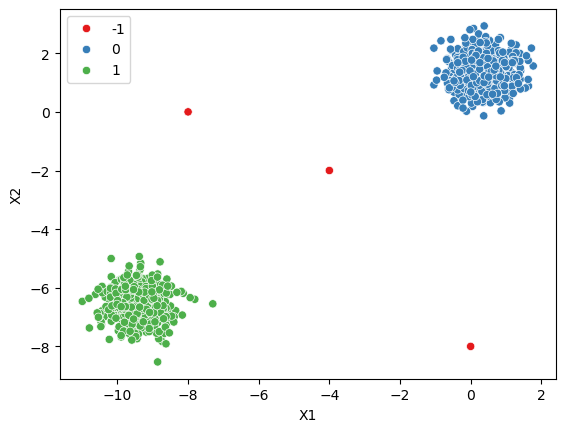

In [29]:
dbscan = DBSCAN(eps=1)  # correct claisification
display_cat(dbscan , two_blobs_outliers)

In [30]:
# chekc outliers 
np.sum(dbscan.labels_ == -1)

3

In [32]:
# elbow plot 

outlier_percent = []
nu_outliers = []

for esp in np.linspace(0.001, 10 , 100):

    dbscan = DBSCAN(eps=esp)
    dbscan.fit(two_blobs_outliers)

    nu_outliers.append(np.sum(dbscan.labels_ == -1))
    
    percents = 100*(np.sum(dbscan.labels_ == -1)) / len(dbscan.labels_)
    outlier_percent.append(percents)


(0.0, 2.0)

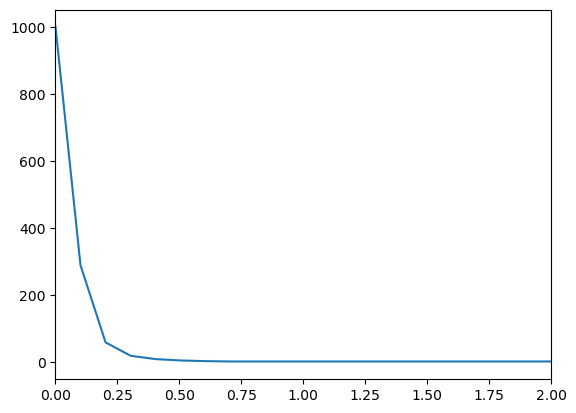

In [36]:
sns.lineplot(x=np.linspace(0.001, 10 , 100) , y=nu_outliers)
plt.xlim(0.0,2.0)

In [37]:
# elbow plot 

outlier_percent = []
nu_outliers = []

for esp in np.linspace(0.001, 7 , 200):

    dbscan = DBSCAN(eps=esp)
    dbscan.fit(two_blobs_outliers)

    nu_outliers.append(np.sum(dbscan.labels_ == -1))
    
    percents = 100*(np.sum(dbscan.labels_ == -1)) / len(dbscan.labels_)
    outlier_percent.append(percents)


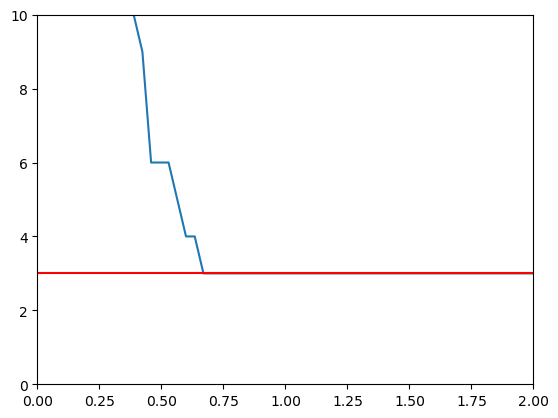

In [38]:
sns.lineplot(x=np.linspace(0.001, 7 , 200) , y=nu_outliers)
plt.xlim(0.0,2.0)
plt.ylim(0,10)
plt.hlines(y=3, xmin=0, xmax=2, color="red")